Homogeneous Transformation
--
Robot Project
--
Frederick Chyan

*Keyboard Mappings*  
**Shoulder - Pitch**: e,d  
**Shoulder - Yaw**: r,f  
**Upper Arm - Pitch**: t,g  
**Gripper - Row**: y,h  
**Gripper - Open/Close**: u,j  


<IPython.core.display.Javascript object>


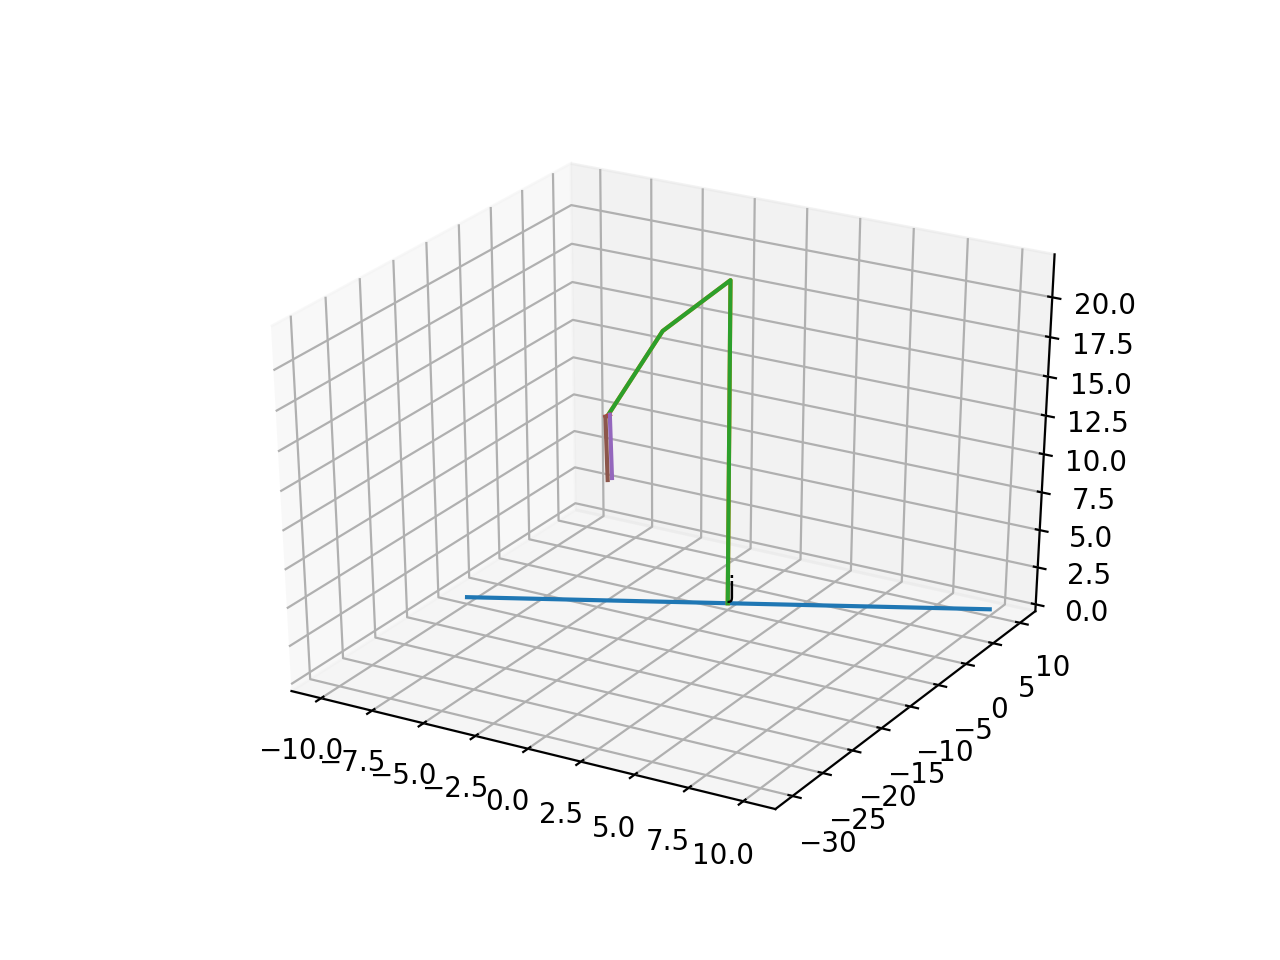

In [33]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import cos,sin

# Functions to generate rotation matrices
def rotz(theta): 
    c = cos(theta)
    s = sin(theta)
    m = np.array(
    [[ c, s, 0, 0],
     [-s, c, 0, 0],
     [ 0, 0, 1, 0],
     [ 0, 0, 0, 1]])
    return m
def rotx(theta): 
    c = cos(theta)
    s = sin(theta)
    m = np.array(
    [[ 1, 0, 0, 0],
     [ 0, c, s, 0],
     [ 0,-s, c, 0],
     [ 0, 0, 0, 1]])
    return m
def roty(theta): 
    c = cos(theta)
    s = sin(theta)
    m = np.array(
    [[ c, 0,-s, 0],
     [ 0, 1, 0, 0],
     [ s, 0, c, 0],
     [ 0, 0, 0, 1]])
    return m

from mpl_toolkits.mplot3d import Axes3D

angle_step = 0.1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

'''
B - Base
S - Shoulder
A - Upper Arm
G - Gripper
'''
ry_s = [0] # shoulder - pitch, key - e, d
rz_s = [0] # shoulder - yaw, key - r, f
ry_a = [0] # upper arm - pitch, key - t, g
rz_g = [0] # gripper - row, key - y, h
gripper_close = [False] # gripper - open/close, key - u, j

def M_B_S():
    return np.array(
    [[ 0, 1, 0, 0],
     [-1, 0, 0, 0],
     [ 0, 0, 1, 21.0],
     [ 0, 0, 0, 1]])

def M_S_A():
    neutral = np.array(
    [[ 1, 0, 0, 17.0],
     [ 0, 1, 0, 0],
     [ 0, 0, 1, 0],
     [ 0, 0, 0, 1]])
    M_s_a = roty(ry_s[0]).dot(rotz(rz_s[0])).dot(neutral)
    return M_s_a

def M_A_G():
    neutral = np.array(
    [[ 1, 0, 0, 13],
     [ 0, 1, 0, 0],
     [ 0, 0, 1, 0],
     [ 0, 0, 0, 1]])
    M_a_g = roty(ry_a[0]).dot(neutral)
    return M_a_g

# F1B - Finger 1 Base
def M_G_F1B():
    offset = -2
    if (gripper_close[0] == True):
        offset = -0.2
    neutral = np.array(
    [[ 1, 0, 0, offset],
     [ 0, 1, 0, 0],
     [ 0, 0, 1, 0],
     [ 0, 0, 0, 1]])
    M_g_f1b = rotz(rz_g[0]).dot(neutral)
    return M_g_f1b

# F2B - Finger 2 Base
def M_G_F2B():
    offset = 2
    if (gripper_close[0] == True):
        offset = 0.2
    neutral = np.array(
    [[ 1, 0, 0, offset],
     [ 0, 1, 0, 0],
     [ 0, 0, 1, 0],
     [ 0, 0, 0, 1]])
    M_g_f2b = rotz(rz_g[0]).dot(neutral)
    return M_g_f2b

# FT - Finger Tip 
def M_G_FT():
    neutral = np.array(
    [[ 1, 0, 0, 0],
     [ 0, 1, 0, 0],
     [ 0, 0, 1, -4],
     [ 0, 0, 0, 1]])
    M_g_ft = neutral
    return M_g_ft

def redraw():
    ax.plot([-10,10],[-10,10],[0,0])
    pB = [0,0,0,1]
    pS = M_B_S().dot([0,0,0,1])
    pA = M_B_S().dot(M_S_A()).dot([0,0,0,1])
    pG = M_B_S().dot(M_S_A()).dot(M_A_G()).dot([0,0,0,1])
    pF1B = M_B_S().dot(M_S_A()).dot(M_A_G()).dot(M_G_F1B()).dot([0,0,0,1])
    pF2B = M_B_S().dot(M_S_A()).dot(M_A_G()).dot(M_G_F2B()).dot([0,0,0,1])
    pF1T = M_B_S().dot(M_S_A()).dot(M_A_G()).dot(M_G_F1B()).dot(M_G_FT()).dot([0,0,0,1])
    pF2T = M_B_S().dot(M_S_A()).dot(M_A_G()).dot(M_G_F2B()).dot(M_G_FT()).dot([0,0,0,1])
    pts = np.vstack((pB,pS,pA,pG)).T
    ax.plot(pts[0,:],pts[1,:],pts[2,:])
    pts_finger_base = np.vstack((pF1B, pF2B)).T
    pts_finger1 = np.vstack((pF1B, pF1T)).T
    pts_finger2 = np.vstack((pF2B, pF2T)).T
    ax.plot(pts[0,:],pts[1,:],pts[2,:])
    ax.plot(pts_finger_base[0,:],pts_finger_base[1,:],pts_finger_base[2,:])
    ax.plot(pts_finger1[0,:],pts_finger1[1,:],pts_finger1[2,:])
    ax.plot(pts_finger2[0,:],pts_finger2[1,:],pts_finger2[2,:])
redraw()

def onkey(event):
    #global ry_s, rz_s
    #This gets called when you press a key(click figure first to activate)
    #WARNING! If you make an error in this function, you will not be told! 
    
    ax.cla() #clear the previous plot
    text=ax.text(0,0,0, "", va="bottom", ha="left")
    text.set_text(event.key)
    k = event.key
    from numpy import pi
    if k == "e":
        ry_s[0] += angle_step
        
        ry_s[0] = min(ry_s[0], pi/2)
    elif k == "d":
        ry_s[0] -= angle_step
        ry_s[0] = max(ry_s[0], -pi/2)
    elif k == "r":
        rz_s[0] += angle_step
        rz_s[0] = min(rz_s[0], pi/2)
    elif k == "f":
        rz_s[0] -= angle_step
        rz_s[0] = max(rz_s[0], -pi/2 )
    elif k == 't':
        ry_a[0] += angle_step
        # cannot open past straight
        ry_a[0] = min(ry_a[0], 0)
    elif k == 'g':
        ry_a[0] -= angle_step
        # cannot close to less than 15 degrees
        ry_a[0] = max(ry_a[0], -(90-15)*pi/180)
    elif k == 'y':
        rz_g[0] += angle_step
    elif k == 'h':
        rz_g[0] -= angle_step
    elif k == 'u':
        gripper_close[0] = False
    elif k == 'j':
        gripper_close[0] = True
    redraw()
    return

cid = fig.canvas.mpl_connect('key_press_event', onkey) #attach the onkey function to the figure
